<a href="https://www.kaggle.com/code/stutiiikatariaaa/poissongam?scriptVersionId=270016175" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 13.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 50.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.11.4 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
plotn

In [2]:
import pandas as pd
import numpy as np
from pygam import LinearGAM, s
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# Load data
df = pd.read_csv('/kaggle/input/solargeneration/dataset.csv')
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')

# Feature engineering
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek

# Select features and target
features = ['temperature', 'Ground_radiation_intensity ', 'hour']
X = df[features]
y = df['Photovoltaic_power_generation']

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

In [23]:
# Fit a GAM with smoothing terms for each feature
gam = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)

# Predict
y_pred = gam.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("GAM Test Set Evaluation:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

GAM Test Set Evaluation:
MSE: 353412.00
RMSE: 594.48
MAE: 502.65
R² Score: 0.7221


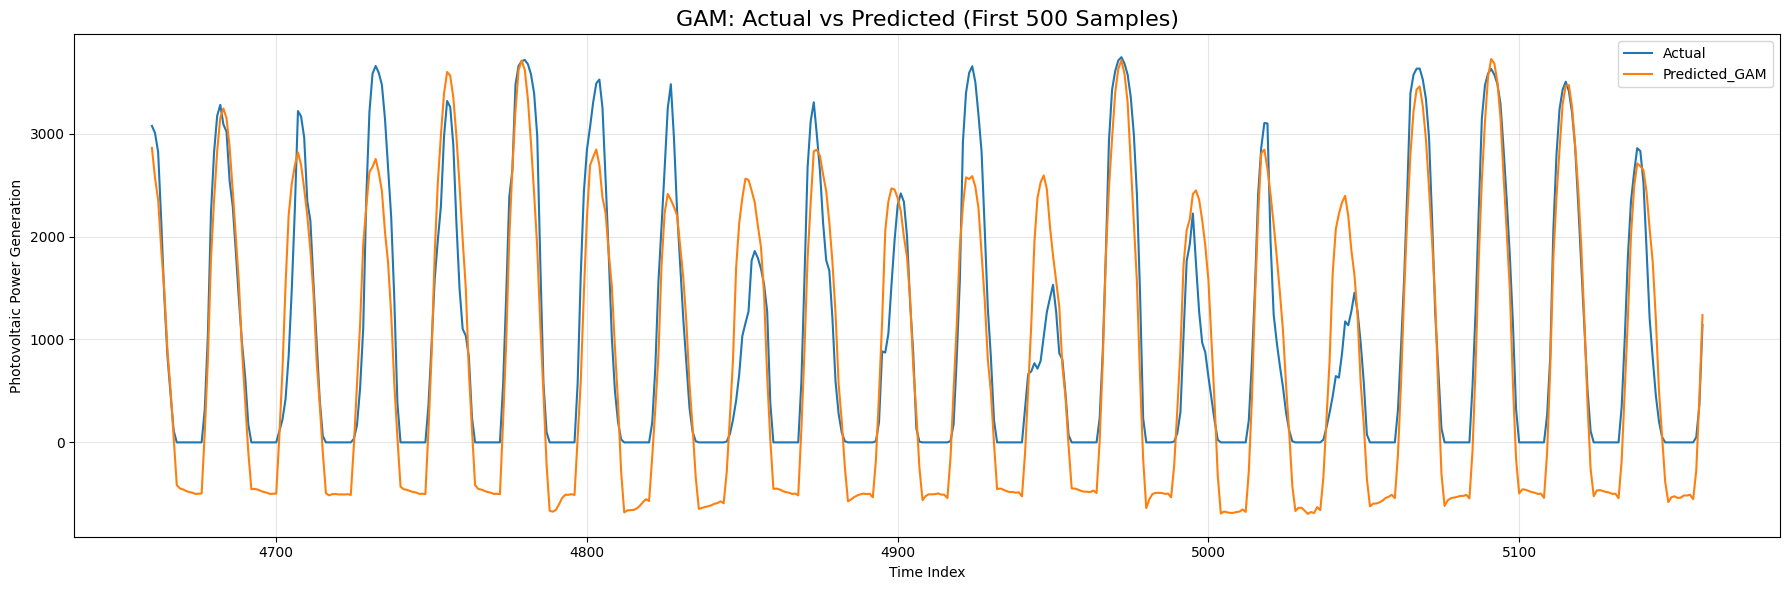

In [5]:
results = pd.DataFrame({'Actual': y_test, 'Predicted_GAM': y_pred}, index=y_test.index)
plt.figure(figsize=(18, 6))
results.head(500).plot(ax=plt.gca())
plt.title("GAM: Actual vs Predicted (First 500 Samples)", fontsize=16)
plt.xlabel("Time Index")
plt.ylabel("Photovoltaic Power Generation")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--/usr/local/lib/python3.11/dist-packages/pygam/utils.py:78: UserWarning: Could not import Scikit-Sparse or Suite-Sparse.
This will slow down optimization for models with monotonicity/convexity penalties and many splines.
See installation instructions for installing Scikit-Sparse and Suite-Sparse via Conda.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/pygam/pygam.py:629: RuntimeWarning: divide by zero encountered in reciprocal
  * weights**-1
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:03/usr/local/lib/python3.11/dist-packages/pygam/pygam.py:629: RuntimeWarning: divide by zero encountered in reciprocal
  * weights**-1
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:02/usr/local/lib/python3.11/dist-packages/pygam/pygam.py:629: RuntimeWarning: divide by zero encountered in reciprocal
  * weights**-1
 27% (3 of 11) |######              


📈 PoissonGAM Test Set Evaluation:
MSE: 191504.84
RMSE: 437.61
MAE: 251.55
R² Score: 0.8494


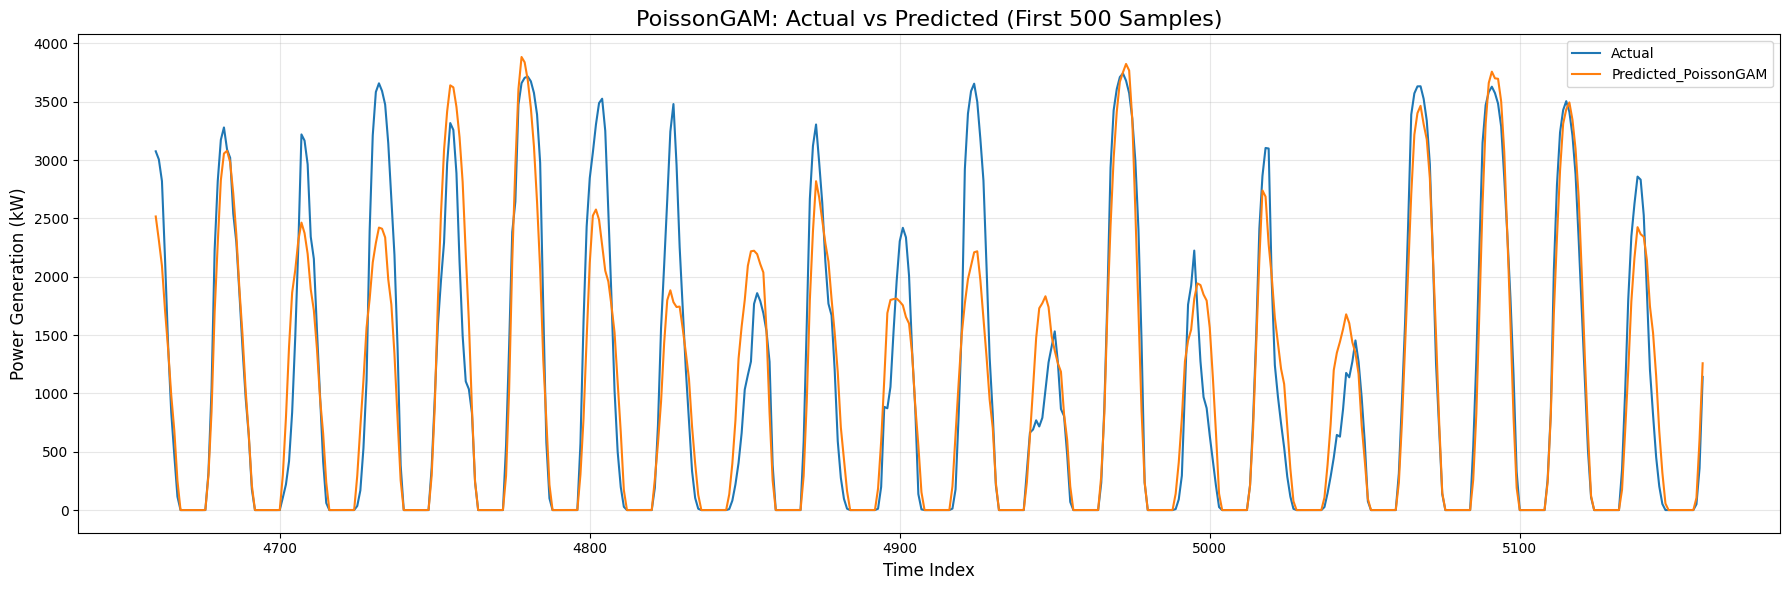

In [18]:
from pygam import PoissonGAM, s
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Fit PoissonGAM (same features as before)
gam = PoissonGAM(s(0) + s(1) + s(2), verbose=True)
gam.gridsearch(X_train.values, y_train.values)

# Predict on test data
y_pred_gam = gam.predict(X_test.values)

# Evaluation
mse_gam = mean_squared_error(y_test, y_pred_gam)
rmse_gam = np.sqrt(mse_gam)
mae_gam = mean_absolute_error(y_test, y_pred_gam)
r2_gam = r2_score(y_test, y_pred_gam)

print("\n📈 PoissonGAM Test Set Evaluation:")
print(f"MSE: {mse_gam:.2f}")
print(f"RMSE: {rmse_gam:.2f}")
print(f"MAE: {mae_gam:.2f}")
print(f"R² Score: {r2_gam:.4f}")

# Plot predictions
plt.figure(figsize=(18, 6))
results = pd.DataFrame({'Actual': y_test, 'Predicted_PoissonGAM': y_pred_gam}, index=y_test.index)
results.head(500).plot(ax=plt.gca())
plt.title("PoissonGAM: Actual vs Predicted (First 500 Samples)", fontsize=16)
plt.xlabel("Time Index", fontsize=12)
plt.ylabel("Power Generation (kW)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


  0% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--/usr/local/lib/python3.11/dist-packages/pygam/utils.py:78: UserWarning: Could not import Scikit-Sparse or Suite-Sparse.
This will slow down optimization for models with monotonicity/convexity penalties and many splines.
See installation instructions for installing Scikit-Sparse and Suite-Sparse via Conda.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/pygam/pygam.py:629: RuntimeWarning: divide by zero encountered in reciprocal
  * weights**-1
 14% (1 of 7) |###                       | Elapsed Time: 0:00:00 ETA:   0:00:02/usr/local/lib/python3.11/dist-packages/pygam/pygam.py:629: RuntimeWarning: divide by zero encountered in reciprocal
  * weights**-1
 28% (2 of 7) |#######                   | Elapsed Time: 0:00:00 ETA:   0:00:01/usr/local/lib/python3.11/dist-packages/pygam/pygam.py:629: RuntimeWarning: divide by zero encountered in reciprocal
  * weights**-1
 42% (3 of 7) |###########          


🔧 Tuned PoissonGAM Test Set Evaluation:
MSE: 191505.25
RMSE: 437.61
MAE: 251.55
R² Score: 0.8494


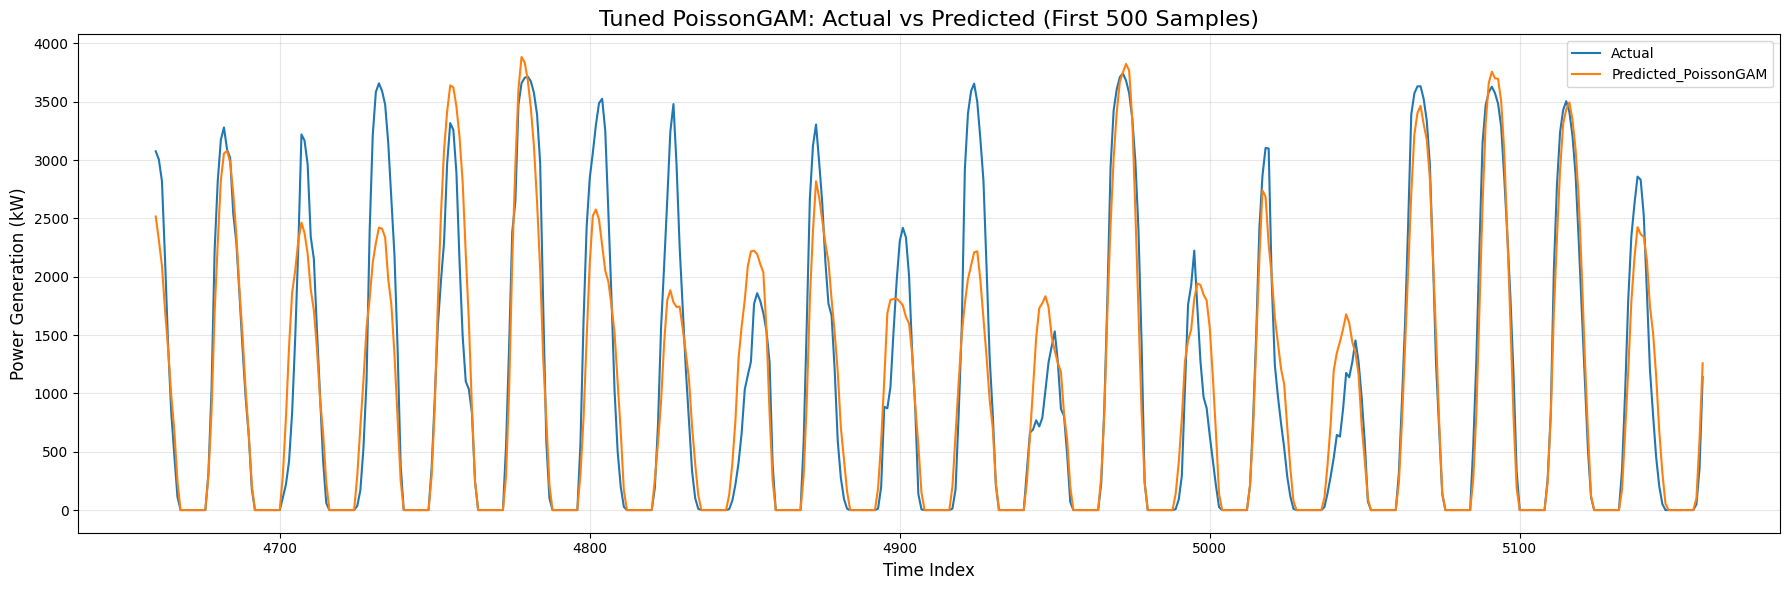

In [22]:
from pygam import PoissonGAM, s
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define PoissonGAM with splines for each input feature
gam = PoissonGAM(s(0) + s(1) + s(2), verbose=True)

# Custom lambda search grid (controls smoothing for each spline term)
lam_values = [0.1, 1, 10, 50, 100, 500, 1000]
grid = {'lam': lam_values}

# Perform grid search
gam.gridsearch(X_train.values, y_train.values, lam=grid['lam'])

# Predict on test data
y_pred_gam = gam.predict(X_test.values)

# Evaluation
mse_gam = mean_squared_error(y_test, y_pred_gam)
rmse_gam = np.sqrt(mse_gam)
mae_gam = mean_absolute_error(y_test, y_pred_gam)
r2_gam = r2_score(y_test, y_pred_gam)

print("\n🔧 Tuned PoissonGAM Test Set Evaluation:")
print(f"MSE: {mse_gam:.2f}")
print(f"RMSE: {rmse_gam:.2f}")
print(f"MAE: {mae_gam:.2f}")
print(f"R² Score: {r2_gam:.4f}")

# Plot predictions
plt.figure(figsize=(18, 6))
results = pd.DataFrame({'Actual': y_test, 'Predicted_PoissonGAM': y_pred_gam}, index=y_test.index)
results.head(500).plot(ax=plt.gca())
plt.title("Tuned PoissonGAM: Actual vs Predicted (First 500 Samples)", fontsize=16)
plt.xlabel("Time Index", fontsize=12)
plt.ylabel("Power Generation (kW)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
